# Выявление закономерностей, определяющих успешность игр 

В моем распоряжении исторические данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы. Моя задача - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры.

## Изучение данных из файла

Мой основной инструмент — `pandas`. Я подключаю эту библиотеку. Также подключаю библиотеки `re`, `numpy`, `matplotlib` и `warnings` - они понадобятся для моих исследований.

Дополнительно отключу предупреждения.

In [61]:
import pandas as pd                # импорт библиотеки pandas
import re                          # импорт библиотеки регулярных выражений re
import numpy as np                 # импорт библиотеки numpy
import matplotlib.pyplot as plt    # импорт библиотеки matplotlib
import warnings as wg              # импорт библиотеки warnings
from scipy import stats as st

wg.filterwarnings('ignore')

Далее осуществляю чтение файла games.csv из папки /datasets и сохраняю его в переменной data. Вывожу на экран первые пять строк таблицы.

In [2]:
# чтение файла с данными и сохранение в data в зависимости от его расположения
try:
    data = pd.read_csv('/Users/a4128/Documents/My_projects/04_Games/games.csv') # локальный путь
except:
    data = pd.read_csv('/datasets/games.csv') # серверный путь

display(data.head()) # получение первых 5 строк таблицы data

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [3]:
print('Общая нформация об исходной таблице данных:')
print()
data.info() # получение общей информации о данных в таблице data

Общая нформация об исходной таблице данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Для получения статистической информации о количественных данных использую метод `describe()` из библиотеки регулярных выражений `re`. Он поможет сразу увидеть некоторые проблемы в данных.
Для числовых переменных я оценю среднее, минимальное и максимальное значения, чтобы установить, в каком диапазоне лежат данные. Процентиль в данном случае не буду оценивать, поэтому список `percentiles` оставлю пустым. В список `include` я не буду включать категориальные переменные, а оставлю только `float` (`int` в таблице не обнаружено). Для наглядности округлю значения в таблице методом `round`.

In [4]:
# сведения о значениях в столбцах с количественными значениями
display(round(data.describe(percentiles = [], include = ['float']))) 

Year_of_Release  NA_sales  EU_sales  JP_sales  Other_sales  \
count          16446.0   16715.0   16715.0   16715.0      16715.0   
mean            2006.0       0.0       0.0       0.0          0.0   
std                6.0       1.0       1.0       0.0          0.0   
min             1980.0       0.0       0.0       0.0          0.0   
50%             2007.0       0.0       0.0       0.0          0.0   
max             2016.0      41.0      29.0      10.0         11.0   

       Critic_Score  
count        8137.0  
mean           69.0  
std            14.0  
min            13.0  
50%            71.0  
max            98.0

In [5]:
# сведения о значениях в столбцах с категориальными значениями
display(data.describe(percentiles = [], include = ['object']))

Name Platform   Genre User_Score Rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

### Вывод по разделу

Итак, данные получены, отображены и предварительно пранализированы.

Исходный датафрейм содержит 16715 записей (строк), 11 столбцов, занимает более 1.4 Мб памяти.

Тип данных в столбцах — `object` и `float`.

Согласно документации к данным:
    
* `Name` — название игры;
* `Platform` — платформа;
* `Year_of_Release` — год выпуска;
* `Genre` — жанр игры;
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий);
* `EU_sales` — продажи в Европе (миллионы проданных копий);
* `JP_sales` — продажи в Японии (миллионы проданных копий);
* `Other_sales` — продажи в других странах (миллионы проданных копий);
* `Critic_Score` — оценка критиков (максимум 100);
* `User_Score` — оценка пользователей (максимум 10);
* `Rating` — рейтинг от организации ESRB.


В результате предварительного анализа обнаружены следующие ошибки и недочеты в данных:
* во всех столбцах присутствует нарушение стиля названий (заглавные буквы);
* количество значений в столбцах различается (значит, в данных есть пропущенные значения, требующие дополнительной предобработки)
* некоторые типы данных не соответствуют логике, а именно, в колонках `Year_of_Release`, `User_Score`. 

На этапе предобработки будет проведена оценка корректности данных по каждому столбцу, при необходимости, их исправление, замена типов данных и обработка дубликатов при их наличии.

*Примечания:*

* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
* Данные за год могут быть неполными.

## Предобработка данных

### Восстановление стиля названий столбцов

Для начала восстановлю стиль названий для тех колонок, где я обнаружила нарушения:

In [6]:
# переименование столбцов
data = data.rename(columns={'Name': 'name',
                            'Platform': 'platform',
                            'Year_of_Release': 'year_of_release',
                            'Genre': 'genre',
                            'NA_sales': 'na_sales',
                            'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales',
                            'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score',
                            'User_Score': 'user_score',
                            'Rating': 'rating'})
data.columns # проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка дубликатов

In [7]:
text_columns = ['platform', 'genre']
for element in text_columns:
    print(data[element].unique())
    print()
    
print('Кол-во уникальных значений в столбце name -', len(data['name'].unique()))
print()
print('Количнство явных дубликатов в датафрейме -', data.duplicated().sum())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Кол-во уникальных значений в столбце name - 11560

Количнство явных дубликатов в датафрейме - 0


Категориальные переменные не нуждаются в дополнительной обработке, кроме заполнения пропусков в столбце `genre`.

### Обработка пропущенных значений

In [8]:
# выявление колонок, содержащих пропуски; сортировка по убыванию количества пропусков
print(data.isna().sum().sort_values(ascending=False))

critic_score       8578
rating             6766
user_score         6701
year_of_release     269
name                  2
genre                 2
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64


#### В столбцах "название" и "жанр" (name и genre)

Предположу, что 2 записи, в которых содержатся пропуски в столбцах `name` и `genre`, соответствуют друг другу и проверю свое предположение:

In [9]:
display(data.query('name.isna()'))

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN

Видно, что это 2 очень неинформативные строки, в них пропущены практически все нужные для исследования значения, поэтому я исключу их из датафрейма.

In [10]:
data = data[~(data['name'].isna())]
# Проверка
print('Кол-во пропусков в столбце:')
print('name -', data['name'].isna().sum())
print('genre -', data['genre'].isna().sum())

Кол-во пропусков в столбце:
name - 0
genre - 0


#### В столбце "год выпуска" (year_of_release)

In [11]:
print('Всего пропусков в столбце year_of_release -', data['year_of_release'].isna().sum())
print('Доля пропущенных значений составляет {:.1%}'.format(len(data.query('year_of_release.isna()')) / len(data)))

Всего пропусков в столбце year_of_release - 269
Доля пропущенных значений составляет 1.6%


In [12]:
display(data.query('year_of_release.isna()'))

name platform  year_of_release  \
183                      Madden NFL 2004      PS2              NaN   
377                     FIFA Soccer 2004      PS2              NaN   
456           LEGO Batman: The Videogame      Wii              NaN   
475           wwe Smackdown vs. Raw 2006      PS2              NaN   
609                       Space Invaders     2600              NaN   
...                                  ...      ...              ...   
16373  PDC World Championship Darts 2008      PSP              NaN   
16405                      Freaky Flyers       GC              NaN   
16448                          Inversion       PC              NaN   
16458        Hakuouki: Shinsengumi Kitan      PS3              NaN   
16522                       Virtua Quest       GC              NaN   

              genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183          Sports      4.26      0.26      0.01         0.71          94.0   
377          Sports      0.59      2.36      0.04         0.51          84.0   
456          Action      1.80      0.97      0.00         0.29          74.0   
475        Fighting      1.57      1.02      0.00         0.41           NaN   
609         Shooter      2.36      0.14      0.00         0.03           NaN   
...             ...       ...       ...       ...          ...           ...   
16373        Sports      0.01      0.00      0.00         0.00          43.0   
16405        Racing      0.01      0.00      0.00         0.00          69.0   
16448       Shooter      0.01      0.00      0.00         0.00          59.0   
16458     Adventure      0.01      0.00      0.00         0.00           NaN   
16522  Role-Playing      0.01      0.00      0.00         0.00          55.0   

      user_score rating  
183          8.5      E  
377          6.4      E  
456          7.9   E10+  
475          NaN    NaN  
609          NaN    NaN  
...          ...    ...  
16373        tbd   E10+  
16405        6.5      T  
16448        6.7      M  
16458        NaN    NaN  
16522        5.5      T  

[269 rows x 11 columns]

Визуально не удается определить закономерность появления пропусков в столбце `год выпуска`, к тому же их процент не превышает 2%, поэтому для получения возможности преобразовать тип данных в тип `int` я заполню пропущенные значения нулями и при обработке датафрейма буду просто их отфильтровывать.

In [13]:
data.loc[data['year_of_release'].isna(), 'year_of_release'] = 0
# Проверка
print('Всего пропусков в столбце year_of_release -', data['year_of_release'].isna().sum())

Всего пропусков в столбце year_of_release - 0


#### В столбце "рейтинг" (rating)

In [14]:
print('Всего пропусков в столбце rating -', data['rating'].isna().sum())
print('Доля пропущенных значений составляет {:.1%}'.format(len(data.query('rating.isna()')) / len(data)))

Всего пропусков в столбце rating - 6764
Доля пропущенных значений составляет 40.5%


Огрмное количество пропусков - больше 40%. Исключать данные с пропусками повлияет на качество выборки, поэтому это смысла не имеет, однако от пропусков избавиться необходимо, чтобы появилась возможность беспрепятственно обрабатывать весь датафрейм. Т.к. столбец содержит категориальные переменные, а не количественные, то логичнее всего заполнить пропуски некоторым установленным значением, например, 'rating_nan'. Проверю на всякий случай, не содержится ли такое значение в столбце, хотя очень вряд ли:

In [15]:
print(len(data.query('rating == "rating_nan"')))

0


Отлично, тогда смело заменю все пропущенные значение на `rating_nan`.

In [16]:
data.loc[data['rating'].isna(), 'rating'] = 'rating_nan'
# Проверка
print('Всего пропусков в столбце rating -', data['rating'].isna().sum())

Всего пропусков в столбце rating - 0


#### В столбце "оценка критиков" (critic_score)

In [17]:
print('Всего пропусков в столбце critic_score -', data['critic_score'].isna().sum())
print('Доля пропущенных значений составляет {:.1%}'.format(len(data.query('critic_score.isna()')) / len(data)))
print('Тип данных в столбце -', data['critic_score'].dtypes)
#print(data['critic_score'].describe())

Всего пропусков в столбце critic_score - 8576
Доля пропущенных значений составляет 51.3%
Тип данных в столбце - float64


Больше половины значений в таблице не определено. На практике было бы правильно установить причину пропусков и восстановить данные. Но пока такой возможности нет, заполнение этого столбца по любому принципу приведет к искажению корреляционного анализа и результатов корреляционных тестов, поэтому пропуски заполнять не буду.

#### В столбце "оценка пользователей" (user_score)

In [18]:
print('Всего пропусков в столбце user_score -', data['user_score'].isna().sum())
print('Доля пропущенных значений составляет {:.1%}'.format(len(data.query('user_score.isna()')) / len(data)))
print('Тип данных в столбце -', data['user_score'].dtypes)

Всего пропусков в столбце user_score - 6699
Доля пропущенных значений составляет 40.1%
Тип данных в столбце - object


Колонка `user_score` имеет тип строковый, пропусков большое количество - больше 40%. Проверю, какие значения содержатся в столбце:

In [19]:
print(data['user_score'].value_counts().head())

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: user_score, dtype: int64


Столбец содержит как целочисленные значения, так и дробные, вдобавок в столбце содержится и строковое значение `tbd`, с которым отдельно нужно разобраться. 
TBD — это сокращение произошло от выражения «to be determined”, что можно перевести на русский, как `подлежит определению`. Т.к. мне предстоит работать с данными этого столбца, как с количественными значениями, необходимо перевести столбец к типу `float`, поэтому нужно заменить `tbd` на `nan`.

In [20]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [21]:
print('Всего пропусков в столбце user_score -', data['user_score'].isna().sum())
print('Доля пропущенных значений составляет {:.1%}'.format(len(data.query('user_score.isna()')) / len(data)))

Всего пропусков в столбце user_score - 9123
Доля пропущенных значений составляет 54.6%


Количество пропусков увеличилось, однако, появилась возможность изменить тип столбца на вещественный и продолжать с ним работать. Заполнение этого столбца по любому принципу приведет к искажению корреляционного анализа и результатов корреляционных тестов, так же, как и в ситуации с `critic_score`, поэтому пропуски заполнять я не буду.

Итоговая таблица пропущенных значений выглядит следующим образом:

In [22]:
print(data.isna().sum().sort_values(ascending=False))

user_score         9123
critic_score       8576
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
rating                0
dtype: int64


### Приведение типов данных

Изменю типы данных в столбцах `year_of_release`, `user_score`, 

In [23]:
print('Исходный тип данных в столбце year_of_release -', data['year_of_release'].dtypes)
data['year_of_release'] = data['year_of_release'].astype('int')
print('После замены тип данных в столбце year_of_release -', data['year_of_release'].dtypes)
print()
print('Исходный тип данных в столбце user_score -', data['user_score'].dtypes)
data['user_score'] = data['user_score'].astype('float')
print('После замены тип данных в столбце user_score -', data['user_score'].dtypes)

Исходный тип данных в столбце year_of_release - float64
После замены тип данных в столбце year_of_release - int64

Исходный тип данных в столбце user_score - object
После замены тип данных в столбце user_score - float64


### Расчет суммарных продаж

Рассчитаю суммарные продажи во всех регионах и запишу их в отдельный столбец:

In [24]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
print(data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sum_sales']].head())

   na_sales  eu_sales  jp_sales  other_sales  sum_sales
0     41.36     28.96      3.77         8.45      82.54
1     29.08      3.58      6.81         0.77      40.24
2     15.68     12.76      3.79         3.29      35.52
3     15.61     10.93      3.28         2.95      32.77
4     11.27      8.89     10.22         1.00      31.38


### Вывод по разделу

В результате проведенной предобработки данных:

* восстановлен стиль заголовков для тех колонок, где обнаружены нарушения;
* проведена обработка пропусков:
    * исключены неинформативные строки;
    * пропуски в столбце с категориальными переменными заменены "заглушками";
    * пропуски в столбцах оценки (их более половины от всех данных) заменены не были, т.к. их замена может привести к искажению результатов статистических тестов и корреляционного анализа.
* типы данных приведены к типам, с которыми можно проводить последующий анализ данных object -> float, float -> int.
* в датафрейм добавлен дополнительный столбец `sum_sales`, содержащий суммарные продажи по всем регионам.

## Исследовательский анализ данных

Заранее напишу функцию для вывода гистограмм и диаграмм размаха на одном графике, т.к. они будут неоднократно использоваться в моем исследовании:

In [25]:
def grafics(df, column, bins, title):
    fig, axes = plt.subplots(1,2,figsize=(15,6))
    df[column].plot(kind='hist', bins=bins, grid=True, title=title, ax=axes[0])
    df.boxplot((column), ax=axes[1]);

### Анализ дат релиза

Посмотрю, сколько игр выпускалось в разные годы:

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
Name: year_of_release, dtype: int64

count    16444.0
mean      2006.0
std          6.0
min       1980.0
25%       2003.0
50%       2007.0
75%       2010.0
max       2016.0
Name: year_of_release, dtype: float64


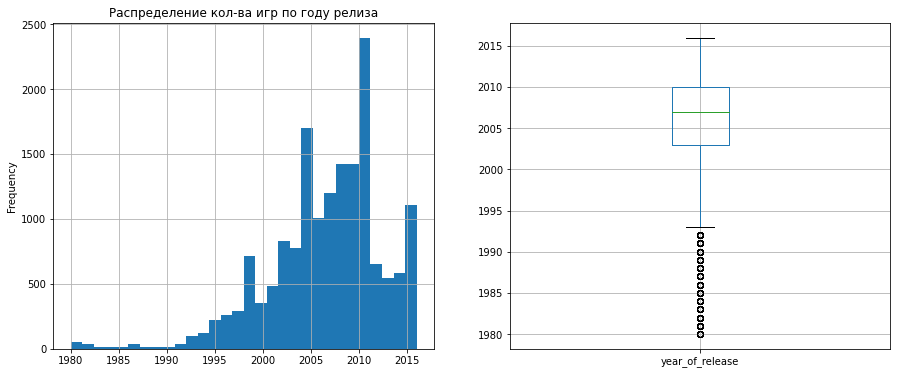

In [26]:
data_year = data.query('year_of_release != 0')

print(data_year['year_of_release'].value_counts(ascending=False).head(5))
print()

print(round(data_year['year_of_release'].describe()))
grafics(data_year, 'year_of_release', 30, 'Распределение кол-ва игр по году релиза')

Исходя из данных гистограммы и диаграммы размаха, можно сделать следующие выводы:
* в выборке присутствуют данные с датой релиза с 1980 по 2016 года,
* с 1990 по 2010 года наблюдалась тенденция к росту выпускаемых игр, однако после 2010 кол-во релизов пошло на спад,
* большинство компьютерных игр выпущено в период с 2003 по 2010 год,
* пик приходится на 2008 и 2009 года, в которые было выпущено 1427 и 1426 игр соответственно,
* ориентировочная нижняя граница нормального размаха - 1993 год, все данные, что раньше 1993 рисуются отдельными точками, их можно считать выбросами - их немного и они не важны для исследований.

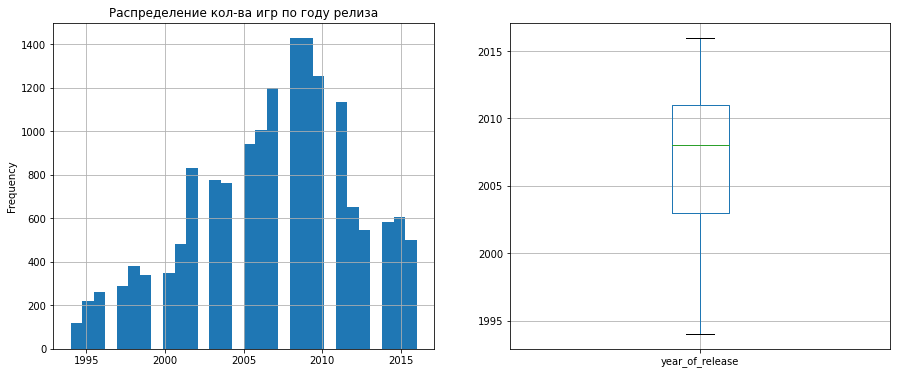

In [27]:
grafics(data_year.query('year_of_release > 1993'), 'year_of_release', 30, 'Распределение кол-ва игр по году релиза')

### Анализ платформ

Попробую проанализировать, как менялись продажи по платформам. Для этого я выберу платформы с наибольшими суммарными продажами и построю распределение по годам.  

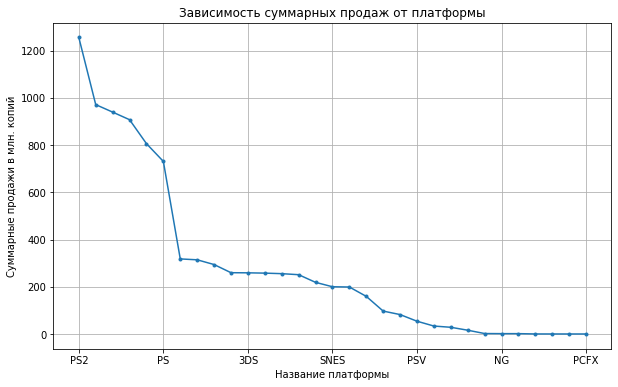

In [28]:
(data
 .groupby('platform')['sum_sales'].sum()
 .sort_values(ascending=False)
 .plot(x='platform', y='sum_sales', grid=True, marker='.', figsize=(10,6))
)
plt.title('Зависимость суммарных продаж от платформы')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи в млн. копий');

Из графика выше можно увидеть, что топовыми платформами являются те, у которых суммарные продажи превышают пороговое значение примерно в 700-750 миллионов проданных копий, поэтому ограничу топовые платформы значением 700.

In [29]:
print(data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10))

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: sum_sales, dtype: float64


Из таблицы явно видно, что это 6 платформ: PS2, X360, PS3, Wii, DS и PS. Выберу нужный мне датафрейм и построю распределение по годам (использую только те строки, в которых указан год релизов игр - это датафрейм `data_year`) для тех платформ, у которых продажи превысили 700 млн копий.

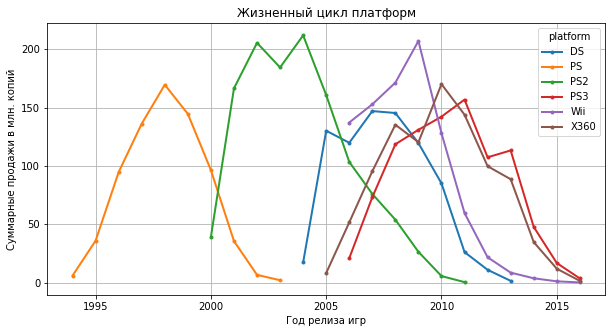

In [30]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
data_platform = data_year.query('year_of_release > 1993 and platform in @top_platforms')
platform_pivot = data_platform.pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
#print(platform_pivot)
platform_pivot.plot(figsize=(10,5), grid=True, linewidth = 2, marker='.')
plt.title('Жизненный цикл платформ')
plt.xlabel('Год релиза игр')
plt.ylabel('Суммарные продажи в млн. копий');

По результатам построения видно, что жизненный цикл топовых платформ выглядит примерно одинаково, выход новой платформы -> рост количества новых игр -> пик -> снижение количества игр -> прекращение релизов. Попробую рассчитать за какой характерный срок появляются новые и исчезают старые платформы. Для этого необходимо разбить графики пиковым значением на 2 части и посчитать среднее время, которое
* требуется платформе для достижения своего пикового значения;
* проходит от пикового значения до года полного прекращения релизов этой платформы.

Я думаю, что для упрощения расчетов можно принять пиковое значение за половину графика. Рассчитаю характерный срок появления новых и ухода старых платформ. Посчитаю количество уникальных записей методом `nunique()`, поделю пополам, чтобы рассматривать половину жизненного цикла платформы и возьму среднее значение. Это и будет ориентировочное время роста и падения платформы.

In [31]:
report = (data_year
          .query('year_of_release > 1993')
          .groupby(['platform', 'year_of_release'])
          .agg({'sum_sales': 'sum'})
         )
time = report.reset_index().groupby('platform').agg({'year_of_release': 'nunique'}).mean() / 2
print(round(time))

year_of_release    3.0
dtype: float64


В результате расчета выявлено, что характерный срок появления новых и ухода старых платформ составляет около 3 лет. Т.е. в среднем в течение 3 лет платформа набирает обороты, достигает пика популярности, выпускает максимум продаваемых игр и далее в течение 3 лет теряет популярность и постепенно уходит с рынка.

Для того, чтобы определить, на каких платформах имеет смысл выпускать новые игры, нужно определить актуальный период. Я буду считать актуальным периодом последние 3 года представленных данных, т.е. с 2014 по 2016 год. Эти данные помогут построить прогноз на 2017 год, данные за предыдущие годы учитывать не буду.

In [32]:
data_actual = data.query('year_of_release >= 2014')

Выясню, какие платформы лидируют по продажам в обозначенном периоде времени, какие растут, какие падают. Выберу несколько потенциально прибыльных платформ.

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
PSP       0.36
Name: sum_sales, dtype: float64


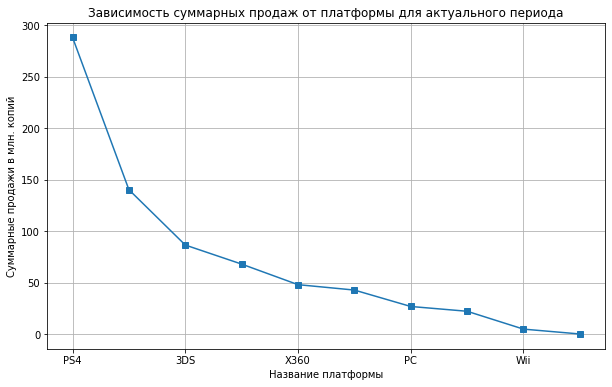

In [33]:
(data_actual
 .groupby('platform')['sum_sales'].sum()
 .sort_values(ascending=False)
 .plot(x='platform', y='sum_sales', grid=True, marker='s', figsize=(10,6))
)
plt.title('Зависимость суммарных продаж от платформы для актуального периода')
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи в млн. копий');
print(data_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10))

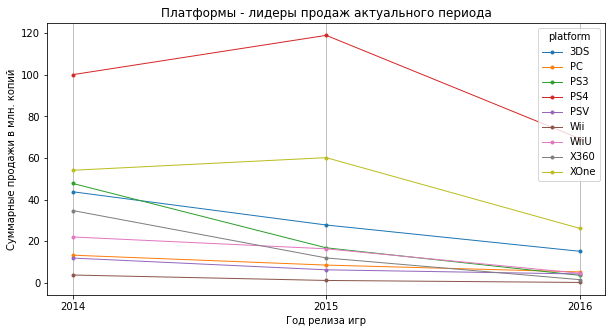

In [34]:
platform_top = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV', 'Wii']
runs = [2014,2015,2016]
(data_actual.query('platform in @platform_top')
 .pivot_table(index='year_of_release', columns='platform', values='sum_sales', aggfunc='sum')
 .plot(figsize=(10,5), grid=True, linewidth = 1, marker='.', )
)
plt.xticks(runs)
plt.grid(axis = 'y')
plt.title('Платформы - лидеры продаж актуального периода')
plt.xlabel('Год релиза игр')
plt.ylabel('Суммарные продажи в млн. копий');

По всем исследуемым платформам за последний год актуального периода наблюдается спад продаж, однако можно предположить, что лидеры рынка на данный момент, а именно, платформы `PS4` и `XOne` потенциально перспективны на будущий год и могут принести хорошие продажи. До 2015 года наблюдался рост по этим двум платформам, а пик продаж пришелся как раз на 2015 год, а т.к. в предыдущем исследовании было выяснено, что от пика продаж до ухода с рынка платформе в среднем требуется около 3 лет, то еще пару лет игры, выпущенные на этих платформах могут показывать неплохие продажи.

Построю диаграмму размаха значений глобальных продаж игр в разбивке по платформам.

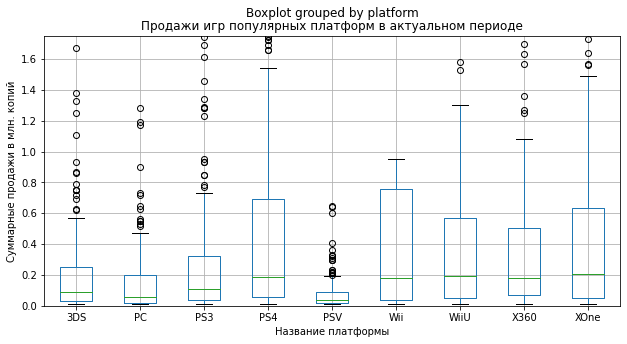

In [35]:
(data_actual
 .query('platform in @platform_top')
 .boxplot(column='sum_sales', by='platform', figsize=(10,5))
)
plt.xlabel('Название платформы')
plt.ylabel('Суммарные продажи в млн. копий')
plt.title('Продажи игр популярных платформ в актуальном периоде')
plt.ylim(0, 1.75);

Из полученных диаграмм размаха можно сделать следующие выводы:
* по всем платформам медиана не превышает значения в 200тыс. проданных копий за период, т.е. хоть и ориентировочные границы нормального размаха по платформам разный, среднее значение суммарных продаж остается примерно на том же уровне;
* видно, что медианы (зелёные линии) не стремятся к хвостам выбивающихся значений, это значит, что выбросы, находящиеся за пределами верхней границы нормального размаха - явление редкое, нечасто случается, что игра собрала суммарных продаж за период больше, чем обычно;
* данные несимметричны и скошены вправо, что означает, что пользователи склонны покупать больше копий игр, чем рассчитанная медиана.

### Анализ отзывов

В данном разделе я буду анализировать, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построю диаграммы рассеяния и посчитаю корреляцию между отзывами и продажами. 

Самой популярной платформой в актуальном периоде является `PS4`, для нее и буду рассчитывать коэффициенты:

In [36]:
data_score = data_actual.query('critic_score != "nan" and user_score != "nan"')

print('Коэффициенты корреляции между суммарными продажами игр платформы PS4 и:')
print('отзывами критиков -', round(data_score.query('platform == "PS4"')['sum_sales'].corr(data_score.query('platform == "PS4"')['critic_score']), 2))
print('отзывами пользователей - ', round(data_score.query('platform == "PS4"')['sum_sales'].corr(data_score.query('platform == "PS4"')['user_score']), 2))

print('Коэффициенты корреляции между суммарными продажами игр платформы XOne и:')
print('отзывами критиков -', round(data_score.query('platform == "XOne"')['sum_sales'].corr(data_score.query('platform == "XOne"')['critic_score']), 2))
print('отзывами пользователей - ', round(data_score.query('platform == "XOne"')['sum_sales'].corr(data_score.query('platform == "XOne"')['user_score']), 2))

Коэффициенты корреляции между суммарными продажами игр платформы PS4 и:
отзывами критиков - 0.4
отзывами пользователей -  -0.04
Коэффициенты корреляции между суммарными продажами игр платформы XOne и:
отзывами критиков - 0.43
отзывами пользователей -  -0.07


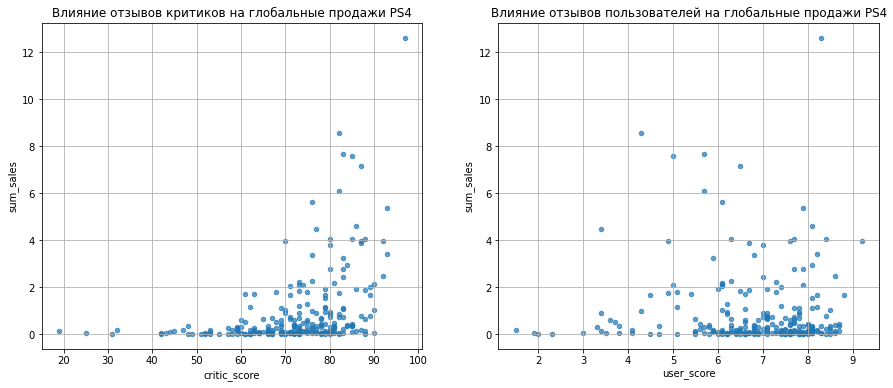

In [37]:
fig, axes = plt.subplots(1,2,figsize=(15,6))
data_score.query('platform == "PS4"').plot(x='critic_score', y='sum_sales', kind='scatter', grid=True, title='Влияние отзывов критиков на глобальные продажи PS4', alpha=0.7, ax=axes[0])
data_score.query('platform == "PS4"').plot(x='user_score', y='sum_sales', kind='scatter', grid=True, title='Влияние отзывов пользователей на глобальные продажи PS4', alpha=0.7, ax=axes[1]);

Для остальных топовых платформ актуального периода `platform_top` также рассчитаю коэффициенты корреляции:

In [38]:
def correlation(platform):
    for element in platform:
        print('Коэффициенты корреляции между суммарными продажами игр платформы', element, 'и:')
        print('отзывами критиков - ', round(data_score[data_score['platform'] == element]['sum_sales'].corr(data_score[data_score['platform'] == element]['critic_score']), 2))
        print('отзывами пользователей - ', round(data_score[data_score['platform'] == element]['sum_sales'].corr(data_score[data_score['platform'] == element]['user_score']), 2))
        print()

platform_top = ['PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU', 'PC', 'PSV']

correlation(platform_top)

Коэффициенты корреляции между суммарными продажами игр платформы PS4 и:
отзывами критиков -  0.4
отзывами пользователей -  -0.04

Коэффициенты корреляции между суммарными продажами игр платформы XOne и:
отзывами критиков -  0.43
отзывами пользователей -  -0.07

Коэффициенты корреляции между суммарными продажами игр платформы 3DS и:
отзывами критиков -  0.31
отзывами пользователей -  0.22

Коэффициенты корреляции между суммарными продажами игр платформы PS3 и:
отзывами критиков -  0.45
отзывами пользователей -  -0.17

Коэффициенты корреляции между суммарными продажами игр платформы X360 и:
отзывами критиков -  0.53
отзывами пользователей -  -0.14

Коэффициенты корреляции между суммарными продажами игр платформы WiiU и:
отзывами критиков -  0.37
отзывами пользователей -  0.41

Коэффициенты корреляции между суммарными продажами игр платформы PC и:
отзывами критиков -  0.17
отзывами пользователей -  -0.07

Коэффициенты корреляции между суммарными продажами игр платформы PSV и:
отзывами кри

Из полученных результатов можно сделать вывод о том, что отзывы пользователей практически не влияют на продажи компьютерных игр топовых платформ, разве что кроме платформы `WiiU`, для которой отзывы пользователей сильно повлияли на продажи в актуальном периоде.
Также можно сказать, что мнение критиков достаточно сильно влияет на продажи компьютерных игр, особенно это заметно по платформе X360, коэффициент корреляции равен 0.53, однако для некоторых платформ, а именно, для `PC` и `PSV`, отзывы критиков никак не повлияли на глобальные продажи игр.

### Анализ жанров

Построю распределение компьютерных игр по жанрам и завиимость суммарных продаж от жанров за весь исследуемый период.

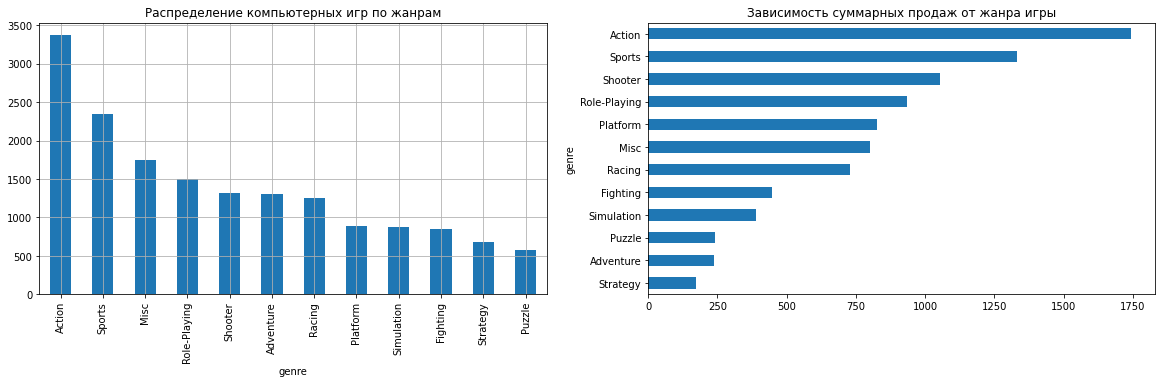

In [39]:
def grafics_genres(df):
    fig, axes = plt.subplots(1,2,figsize=(15,6))
    (df
     .groupby('genre')['name'].count()
     .sort_values(ascending=False)
     .plot(kind="bar", grid=True, figsize=(15,5), title='Распределение компьютерных игр по жанрам', ax=axes[0])
    )
    (df
     .groupby('genre')['sum_sales'].sum()
     .sort_values(ascending=True)
     .plot(kind="barh", fontsize=10, figsize=(20,5), title='Зависимость суммарных продаж от жанра игры', ax=axes[1])
    );

grafics_genres(data)

Теперь построю распределение компьютерных игр по жанрам и завиимость суммарных продаж от жанров за актуальный период.

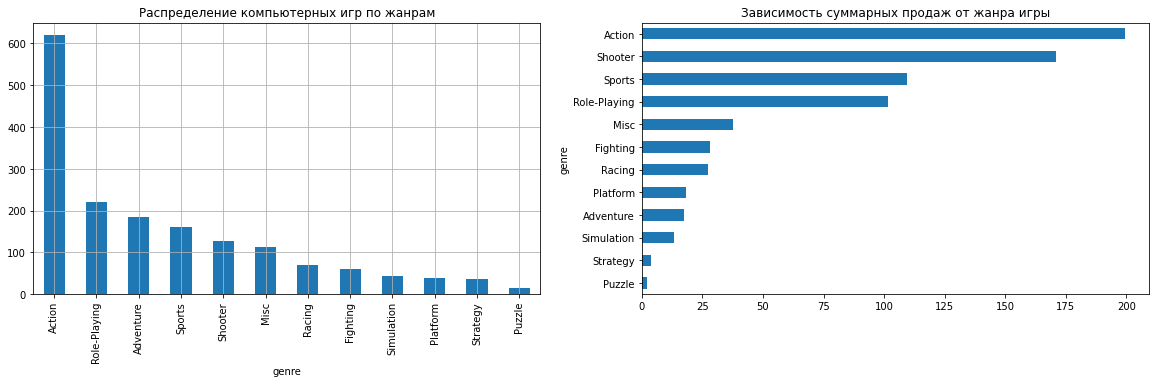

In [40]:
grafics_genres(data_actual)

Самым популярным и прибыльным жанром как за весь исследуемый период, так и за актуальный период является `action`. В этом жанре выпускается больше всего компьютерных игр, а также этот жанр продается самым большим количеством копий во всем мире. На данный момент также популярны жанры `shooter` (в бо́льшей степени), а также жанры `sports` и `role-playing`, однако количество игр в этом жанре невысоко.
Особенно непопулярными жанрами являются `puzzle` и `strategy`, игры в этих жанрах продаются меньше всего, но и игр в этих жанрах выпускается также меньше всего.

### Анализ регионов

Определю для пользователей каждого региона cамые популярные платформы (топ-5) на текущий момент (для актуального периода):

In [41]:
regions = ['na_sales', 'eu_sales', 'jp_sales']
for element in regions:
    print('Топ 5 платформ для', element, 'с указанием доли продаж в регионе:')
    print(round((data_actual.groupby('platform')[element].sum() / data_actual[element].sum()).sort_values(ascending=False).head(), 2))
    print()

Топ 5 платформ для na_sales с указанием доли продаж в регионе:
platform
PS4     0.35
XOne    0.29
X360    0.10
3DS     0.08
PS3     0.08
Name: na_sales, dtype: float64

Топ 5 платформ для eu_sales с указанием доли продаж в регионе:
platform
PS4     0.48
XOne    0.17
PS3     0.09
PC      0.07
3DS     0.06
Name: eu_sales, dtype: float64

Топ 5 платформ для jp_sales с указанием доли продаж в регионе:
platform
3DS     0.48
PS4     0.16
PSV     0.16
PS3     0.12
WiiU    0.08
Name: jp_sales, dtype: float64



В Северной Америке и Европе две самые популярные платформы - это `PS4` (лидер продаж на данный момент) и `XOne`. В Европе на долю `PS4` приходится почти половина всех продаж компьютерных игр, в Северной Америке меньше - чуть более трети всех продаж. Что касается `XOne`, то на ее долю приходится 29% продаж, тогда как в Европе намного меньше - всего 17%. Остальные 3 платформы из топ-5 в Северной Америке - это `X360`, `3DS` и `PS3`, доля продаж примерно одинакова - около 10%. В Европе оставшиеся три платформы также примерно имеют равные доли продаж - это те же `3DS` и `PS3` и в отличие от Северной Америки, платформа `PC` с 7% продаж в Европе.

Что касается Японии, то тут совершенно другая картина: почти половина продаж всех компьютерных игр в Японии приходится на платформу `3DS`, еще три платформы из топ-5 примерно поровну делят `PS4`, `PSV`, `PS3` (16 и 12%) и на долю закрывающего список `WiiU` приходится 8% от всех продаж компьютерных игр в Японии.

Определю для пользователей каждого региона cамые популярные жанры (топ-5):

In [42]:
for element in regions:
    print('Топ 5 жанров для', element, 'с указанием доли продаж в регионе:')
    print(round((data_actual.groupby('genre')[element].sum() / data_actual[element].sum()).sort_values(ascending=False).head(), 2))
    print()

Топ 5 жанров для na_sales с указанием доли продаж в регионе:
genre
Shooter         0.28
Action          0.26
Sports          0.16
Role-Playing    0.12
Misc            0.05
Name: na_sales, dtype: float64

Топ 5 жанров для eu_sales с указанием доли продаж в регионе:
genre
Action          0.28
Shooter         0.24
Sports          0.17
Role-Playing    0.10
Racing          0.05
Name: eu_sales, dtype: float64

Топ 5 жанров для jp_sales с указанием доли продаж в регионе:
genre
Role-Playing    0.33
Action          0.32
Fighting        0.07
Misc            0.06
Shooter         0.05
Name: jp_sales, dtype: float64



Для всех трех рассматриваемых регионов популярным жанром является `Action`, в Европе он лидирует по продажам с 28% от всех продаж, а в Японии и Северной Америке - на втором месте с 32% и 26% соответственно. В Северной Америке жанр-лидер - `Shooter` с 28%, в Европе - на втором месте - с 24%, а в Японии жанр `Shooter` замыкает пятерку популярных жанров с 5% от всех продаж.

В Северной Америке и Европе на 3 и 4 местах расположились жанры `Sports` и `Role-Playing` примерно с одинаковыми продажами от 17 до 10%, однако жанр `Role-Playing` - оказался самым популярным жанром в Японии, треть всех продаж приходится именно на этот жанр. Также японцы играют в игры `Fighting`, `Misc` и `Shooter` (7, 6 и 5% соответстсвенно).

Последние места топ-5 в Северной Америке и Европе занимают жанры `Misc` и `Racing` соответственно с 5% от всех продаж в этих регионах.

Теперь попробую выяснить, влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
for element in regions:
    print('Кол-во суммарных продаж в регионе игр определенного рейтинга для', element)
    print(round((data_actual.groupby('rating')[element].sum() / data_actual[element].sum()).sort_values(ascending=False).head(), 2))
    print()

Кол-во суммарных продаж в регионе игр определенного рейтинга для na_sales
rating
M             0.34
rating_nan    0.23
E             0.18
T             0.14
E10+          0.12
Name: na_sales, dtype: float64

Кол-во суммарных продаж в регионе игр определенного рейтинга для eu_sales
rating
M             0.35
rating_nan    0.22
E             0.21
T             0.13
E10+          0.10
Name: eu_sales, dtype: float64

Кол-во суммарных продаж в регионе игр определенного рейтинга для jp_sales
rating
rating_nan    0.61
T             0.16
E             0.10
M             0.09
E10+          0.05
Name: jp_sales, dtype: float64



Влияет ли рейтинг ESRB на продажи в отдельном регионе?
Поясню, что значат аббревиатуры:
* `E`     — («Everyone»)              — «Для всех»
* `E10+`  — («Everyone 10 and older») — «Для всех старше 10 лет»
* `T`     — («Teen»)                  — «Подросткам 13—19 лет»
* `M`     — («Mature»)                — «От 17 лет»

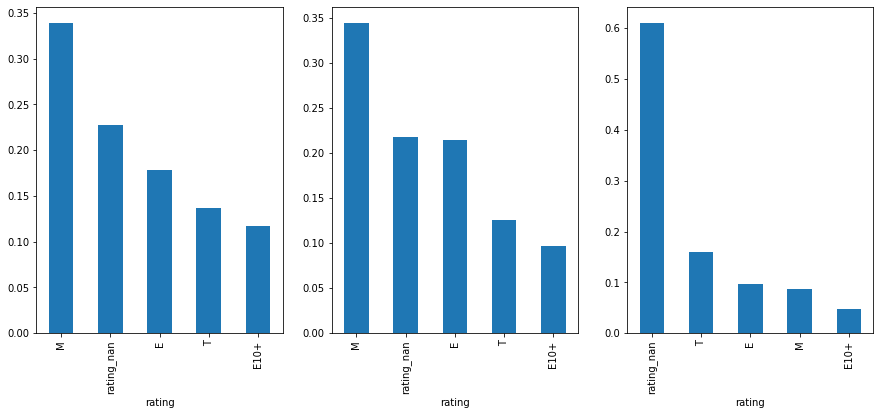

In [44]:
fig, axes = plt.subplots(1,3,figsize=(10,6))
(data_actual.groupby('rating')['na_sales'].sum() / data_actual['na_sales'].sum()).sort_values(ascending=False).head().plot(kind='bar', figsize=(15,6), ax=axes[0])
(data_actual.groupby('rating')['eu_sales'].sum() / data_actual['eu_sales'].sum()).sort_values(ascending=False).head().plot(kind='bar', figsize=(15,6), ax=axes[1])
(data_actual.groupby('rating')['jp_sales'].sum() / data_actual['jp_sales'].sum()).sort_values(ascending=False).head().plot(kind='bar', figsize=(15,6), ax=axes[2]);

На основании построенных диаграмм можно сказать следующее, в Северной Америке и Европе компьютерные игры с рейтингом ESRB `M`, т.е. для пользователей от 17 лет, продаются почти вдвое чаще остальных.

А в Японии, по-видимому, своя система рейтингов, т.к. почти в 60% игр рейтинг ESRB не определен, а там, где рейтинг определен, распределение игр примерно равномерно, поэтому можно сделать вывод о том, что именно в Японии система рейтинга ESRB не влияет на продажи компьютерных игр.

### Выводы по разделу

В данном разделе проведен исследовательский анализ данных и сделаны следующие выводы:
* в выборке присутствуют данные с датой релиза с 1980 по 2016 года,
* с 1990 по 2010 года наблюдалась тенденция к росту выпускаемых игр, однако после 2010 кол-во релизов пошло на спад,
* большинство компьютерных игр выпущено в период с 2003 по 2010 год,
* пик приходится на 2008 и 2009 года, в которые было выпущено 1427 и 1426 игр соответственно,
* ориентировочная нижняя граница нормального размаха - 1993 год, все данные, что раньше 1993 рисуются отдельными точками, их можно считать выбросами - их немного и они не важны для исследований.


* характерный срок появления новых и ухода старых платформ составляет около 3 лет. Т.е. в среднем в течение 3 лет платформа набирает обороты, достигает пика популярности, выпускает максимум продаваемых игр и далее в течение 3 лет теряет популярность и постепенно уходит с рынка;
* по всем исследуемым платформам за последний год актуального периода наблюдается спад продаж, однако можно предположить, что лидеры рынка на данный момент, а именно, платформы PS4 и XOne потенциально перспективны на будущий год и могут принести хорошие продажи. До 2015 года наблюдался рост по этим двум платформам, а пик продаж пришелся как раз на 2015 год, поэтому еще пару лет игры, выпущенные на этих платформах могут показывать неплохие продажи.


* отзывы пользователей практически не влияют на продажи компьютерных игр топовых платформ, разве что кроме платформы WiiU, для которой отзывы пользователей сильно повлияли на продажи в актуальном периоде.
* мнение критиков достаточно сильно влияет на продажи компьютерных игр, особенно отзывы критиков повлияли на игры платформе X360, однако для некоторых платформ, а именно, для PC и PSV, отзывы критиков никак не повлияли на глобальные продажи игр.


* самым популярным и прибыльным жанром как за весь исследуемый период, так и за актуальный период является action. В этом жанре выпускается больше всего компьютерных игр, а также этот жанр продается самым большим количеством копий во всем мире.
* на данный момент также популярны жанры shooter (в бо́льшей степени), а также жанры sports и role-playing, однако количество игр в этом жанре невысоко.
* особенно непопулярными жанрами являются puzzle и strategy, игры в этих жанрах продаются меньше всего, но и игр в этих жанрах выпускается также меньше всего.

* в Северной Америке и Европе две самые популярные платформы - это PS4 (лидер продаж на данный момент) и XOne. В Европе на долю PS4 приходится почти половина всех продаж компьютерных игр, в Северной Америке меньше - чуть более трети всех продаж. Что касается XOne, то на ее долю приходится 29% продаж, тогда как в Европе намного меньше - всего 17%. Остальные 3 платформы из топ-5 в Северной Америке - это X360, 3DS и PS3, доля продаж примерно одинакова - около 10%. В Европе оставшиеся три платформы также примерно имеют равные доли продаж - это те же 3DS и PS3 и в отличие от Северной Америки, платформа PC с 7% продаж в Европе.
* в Японии почти половина продаж всех компьютерных игр в данном регионе приходится на платформу 3DS, еще три платформы из топ-5 примерно поровну делят PS4, PSV, PS3 (16 и 12%) и на долю закрывающего список WiiU приходится 8% от всех продаж компьютерных игр в Японии.

* в Северной Америке, Европе и Японии - для всех трех рассматриваемых регионов популярным жанром является Action, в Европе он лидирует по продажам с 28% от всех продаж, а в Японии и Северной Америке - на втором месте с 32% и 26% соответственно. В Северной Америке жанр-лидер - Shooter с 28%, в Европе - на втором месте - с 24%, а в Японии жанр Shooter замыкает пятерку популярных жанров с 5% от всех продаж.
* в северной Америке и Европе на 3 и 4 местах расположились жанры Sports и Role-Playing примерно с одинаковыми продажами от 17 до 10%, однако жанр Role-Playing - оказался самым популярным жанром в Японии, треть всех продаж приходится именно на этот жанр. Также японцы играют в игры Fighting, Misc и Shooter (7, 6 и 5% соответстсвенно).
* последние места топ-5 в Северной Америке и Европе занимают жанры Misc и Racing соответственно с 5% от всех продаж в этих регионах.

* в Северной Америке и Европе компьютерные игры с рейтингом ESRB M, т.е. для пользователей от 17 лет, продаются почти вдвое чаще остальных.
* в Японии, по-видимому, существует своя система рейтингов, т.к. почти в 60% игр рейтинг ESRB не определен, а там, где рейтинг определен, распределение игр примерно равномерно, поэтому можно сделать вывод о том, что именно в Японии система рейтинга ESRB не влияет на продажи компьютерных игр.

## Проверка гипотез

В данном разделе буду проверять 2 гипотезы:
    
    Гипотеза 1 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    Гипотеза 2 - Средние пользовательские рейтинги жанров Action и Sports разные.
    
Для проверки обеих гипотез необходимо, чтобы отсутствовали пропуски в целевых столбцах, а именно, в `platform`, `genre` и `user_score`. Проверю, так ли:

In [66]:
print(data_actual[['user_score', 'platform', 'genre']].isna().sum())

user_score    801
platform        0
genre           0
dtype: int64


На этапе предобработки данных пропуски в столбце `user_score` заполнены не были, т.к. заполнение по любому принципу могло бы исказить результаты статистических тестов. Я исключу все строки с пропусками для проведения проверки гипотез:

In [65]:
data_scores = data_actual[~data_actual['user_score'].isna()]
# Проверка
print(data_scores[['user_score', 'platform', 'genre']].isna().sum())

user_score    0
platform      0
genre         0
dtype: int64


Посчитаю размер выборкок, с которыми мне предстоит работать, чтобы корректно выбрать критический уровень статистической значимости для проведения теста.

In [67]:
print('Размер рассматриваемой таблицы -', len(data_scores), 'строк.')
print('Объем выборок:')
print('Платформа PC -', len(data_scores.query('platform == "PC"')))
print('Платформа Xbox One -', len(data_scores.query('platform == "XOne"')))
print('Жанр Action -', len(data_scores.query('genre == "Action"')))
print('Жанр Sports -', len(data_scores.query('genre == "Sports"')))

Размер рассматриваемой таблицы - 888 строк.
Объем выборок:
Платформа PC - 122
Платформа Xbox One - 165
Жанр Action - 297
Жанр Sports - 127


### Проверка гипотезы №1

Буду проверять, одинаковы ли средние пользовательские рейтинги платформ Xbox One и PC. Исходя из того, что нулевая гипотеза всегда строится для условия равенства, а альтернативная - это утверждение, которое принимается верным, если отбрасывается нулевая гипотеза,

сформулирую 

    нулевую гипотезу H₀: Пользовательские рейтинги платформ Xbox One и PC одинаковы.
    альтернативную гипотезу H₁: Пользовательские рейтинги платформ Xbox One и PC различаются.

выберу критический уровень статистической значимости, исходя из следующей рекомендации: если объем выборки небольшой до 100 единиц, то можно вполне отвергнуть нулевую гипотезу при уровне значимости 0,05 или даже 0,1. При объеме выборки, измеряемой сотнями – от 100 до 1000, следует понизить уровень значимости хотя бы до 0,01. А при больших выборках, измеряемых тысячами наблюдений, уверенно отвергать нулевую гипотезу можно только при значимости меньшей 0,001. Выбираю критический уровень статистической значимости равным 0.01.

Для проверки гипотезы я буду использовать t-тест, т.к. рассматриваемые генеральные совокупности не зависят друг от друга и размер выборки достаточно велик (770 и 182 записи) и выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности даже если сама генеральная совокупность не распределена нормально.

In [68]:
sample_1 = data_scores.query('platform == "PC"')['user_score']
sample_2 = data_scores.query('platform == "XOne"')['user_score']

alpha = 0.01 # критический уровень статистической значимости
# если p-value окажется меньше него - можно будет отвегнуть гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаю нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


Я не использовала дополнительный параметр `equal_var = False`, потому что выборки достаточно большие, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

Нулевая гипотеза не отвергается в пользу альтернативной - противоположной гипотезы. Делаю вывод, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы.

### Проверка гипотезы №2

Буду проверять, различны ли средние пользовательские рейтинги жанров Action и Sports. 

Формулирую 

    нулевую гипотезу H₀: Пользовательские рейтинги жанров Action и Sports одинаковы.
    альтернативную гипотезу H₁: Пользовательские рейтинги жанров Action и Sports различаются.

Выбираю критический уровень статистической значимости равным 0.01.

Как и в случае гипотезы №1, для проверки гипотезы №2 я буду использовать t-тест.

In [69]:
sample_3 = data_scores.query('genre == "Action"')['user_score']
sample_4 = data_scores.query('genre == "Sports"')['user_score']

alpha = 0.01 # критический уровень статистической значимости
# если p-value окажется меньше него - можно будет отвегнуть гипотезу

results = st.ttest_ind(
    sample_3, 
    sample_4)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаю нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19
Отвергаю нулевую гипотезу


Нулевая гипотеза отвергается в пользу альтернативной - противоположной гипотезы. Делаю вывод, что средние пользовательские рейтинги жанров Action и Sports различны.

### Вывод по разделу

По результатам статистических тестов сделаны следующие выводы:
   * средние пользовательские рейтинги платформ Xbox One и PC одинаковы;
   * средние пользовательские рейтинги жанров Action и Sports различаются.

## Общий вывод

Получены данные о продажах компьютерных игр, оценки пользователей и экспертов, жанры и платформы с 1980 по 2016 год. В результате предварительного анализа обнаружены некоторые ошибки и недочеты в данных, а именно, нарушение стиля названий столбцов, пропуски в данных, нарушение логики в типах данных.

Данные прошли полную предобработку, в результате чего все вышеуказанные ошибки были устранены, кроме заполнения пропусков в столбцах рейтингов, т.к. заполнение этих пропущенных значений по любому принципу исказит результаты статистических тестов.

Проведен исследовательский анализ данных с целью выявления закономерностей, определяющих успешность компьютерной игры, для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Сделаны следующие выводы:
* лидеры рынка на данный момент, а именно, платформы PS4 и XOne потенциально перспективны на ближайшие 2 года и могут принести хорошие продажи;
* отзывы пользователей практически не влияют на продажи компьютерных игр;
* мнение критиков достаточно сильно влияет на продажи компьютерных игр;
* самым популярным и прибыльным жанром для Северной Америки, Европы и Японии является жанр Action. В этом жанре выпускается больше всего компьютерных игр, а также этот жанр продается самым большим количеством копий во всем мире;
* жанр Shooter также весьма популерен в Северной Америке и Европе, а в Японии продажи стрелялок составляют только 5% от всех продаж.
* средние пользовательские рейтинги жанров Action и Sports различны;
* жанр Role-Playing - самый популярный жанр компьтерной игры в Японии;
* особенно непопулярными жанрами являются puzzle и strategy, игры в этих жанрах продаются меньше всего;
* в Северной Америке и Европе две самые популярные платформы - это PS4 (лидер продаж на данный момент) и XOne. Что касается XOne, то на ее долю приходится 29% продаж, тогда как в Европе намного меньше - всего 17%. Остальные 3 платформы из топ-5 в Северной Америке - это X360, 3DS и PS3. В Европе оставшиеся три платформы также примерно имеют равные доли продаж - это те же 3DS и PS3 и в отличие от Северной Америки, платформа PC.
* в Японии почти половина продаж всех компьютерных игр в данном регионе приходится на платформу 3DS, еще три платформы из топ-5 примерно поровну делят PS4, PSV, PS3 и замыкает список платформа WiiU.
* в Северной Америке и Европе компьютерные игры с рейтингом ESRB M, т.е. для пользователей от 17 лет, продаются почти вдвое чаще остальных, для японских пользователей рейтинг ESRB не влияет на продажи;
* средние пользовательские рейтинги платформ Xbox One и PC одинаковы.